# CLUSTERING THE MILITARY POWERS OF COUNTRIES

<div style="text-align:center">
    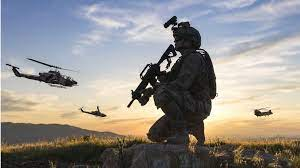
</div>

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from termcolor import colored

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.width",600)
pd.set_option("display.max_rows",100)
pd.set_option('display.float_format', lambda x: '%.3f' % x) 


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import KElbowVisualizer


In [49]:
df = pd.read_excel("World military power.xlsx", header=1)
df.head()

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
0,Afghanistan,1.344,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,Afghanistan,0,Afghanistan,187,Afghanistan,0,Afghanistan,0,Afghanistan,1062,Afghanistan,0,Afghanistan,176,Afghanistan,50,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43,Afghanistan,0,Afghanistan,5500,Afghanistan,0,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,1200,Afghanistan,5987.000
1,Albania,2.314,Albania,19,Albania,0,Albania,0,Albania,0,Albania,0,Albania,19,Albania,0,Albania,0,Albania,467,Albania,0,Albania,0,Albania,0,Albania,38.000,Albania,0.000,Albania,0.000,Albania,0.000,Albania,0.000,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,4,Albania,16000,Albania,42500,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748,Albania,362,Albania,41,Albania,691.000
2,Algeria,0.466,Algeria,551,Algeria,103,Algeria,22,Algeria,59,Algeria,87,Algeria,257,Algeria,45,Algeria,880,Algeria,7361,Algeria,320,Algeria,240,Algeria,316,Algeria,201.000,Algeria,0.000,Algeria,6.000,Algeria,0.000,Algeria,5.000,Algeria,"13,00,00,00,000",Algeria,"6,26,00,00,000",Algeria,157,Algeria,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,6734.000
3,Angola,0.838,Angola,295,Angola,72,Angola,18,Angola,30,Angola,47,Angola,126,Angola,15,Angola,379,Angola,595,Angola,28,Angola,357,Angola,115,Angola,57.000,Angola,0.000,Angola,0.000,Angola,0.000,Angola,0.000,Angola,"7,00,00,00,000",Angola,"42,08,00,00,000",Angola,176,Angola,"16,66,000",Angola,82300,Angola,"8,27,30,00,000",Angola,"62,44,205",Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600,Angola,1300,Angola,5369.000
4,Argentina,0.652,Argentina,227,Argentina,24,Argentina,7,Argentina,9,Argentina,64,Argentina,100,Argentina,0,Argentina,370,Argentina,739,Argentina,83,Argentina,172,Argentina,26,Argentina,49.000,Argentina,0.000,Argentina,2.000,Argentina,4.000,Argentina,0.000,Argentina,"4,20,00,00,000",Argentina,"2,14,90,00,00,000",Argentina,1138,Argentina,"4,79,400",Argentina,"6,85,000",Argentina,"2,18,50,00,000",Argentina,"2,01,79,430",Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989,Argentina,11000,Argentina,11968.000


In [45]:
def check_df(df, head=5, tail=5):
    print(" SHAPE ".center(70, '*'))
    print(f'Observations -------> {df.shape[0]}')
    print(f'Features     -------> {df.shape[1]}')
    print(f"Shape of dataset: {colored(df.shape, 'red')}")
    print(" TYPES OF FEATURES ".center(70, '*'))
    print(df.dtypes,"\n")
    print(" INFO ".center(70, "*"))
    print("\n",df.info(),"\n")
    print(' DUPLICATE VALUE ANALYSIS '.center(70, '*'))
    print("\n",df.duplicated().sum(),"\n")
    print(" MISSING VALUES ".center(70, "*"))
    print(df.isnull().sum())
    print(" DESCRIPTIVE STATISTICS ".center(70, "*"))
    print(df.describe().T)
check_df(df)

******************************* SHAPE ********************************
Observations -------> 138
Features     -------> 60
Shape of dataset: (138, 60)
************************* TYPES OF FEATURES **************************
Military Strength                           object
Military Strength Power Index              float64
Aircraft Strength                           object
Aircraft Strength value                      int64
Fighter/Interceptor Strength                object
Fighter/Interceptor Strength value           int64
Attack Aircraft Strength                    object
Attack Aircraft Strength value               int64
Transport Aircraft Fleet Strength           object
Transport Aircraft Fleet Strength value      int64
Trainer Aircraft Fleet                      object
Trainer Aircraft Fleet value                 int64
Helicopter Fleet Strength                   object
Helicopter Fleet Strength value              int64
Attack Helicopter Fleet Strength            object
Attack Helicop

In [8]:
df.describe(include=object).T

,count,unique,top,freq
Military Strength,138,138,Afghanistan,1
Aircraft Strength,138,138,Afghanistan,1
Fighter/Interceptor Strength,138,138,Afghanistan,1
Attack Aircraft Strength,138,138,Afghanistan,1
Transport Aircraft Fleet Strength,138,138,Afghanistan,1
Trainer Aircraft Fleet,138,138,Afghanistan,1
Helicopter Fleet Strength,138,138,Afghanistan,1
Attack Helicopter Fleet Strength,138,138,Afghanistan,1
Tank Strength,138,138,Afghanistan,1
AFV/APC Strength,138,138,Afghanistan,1


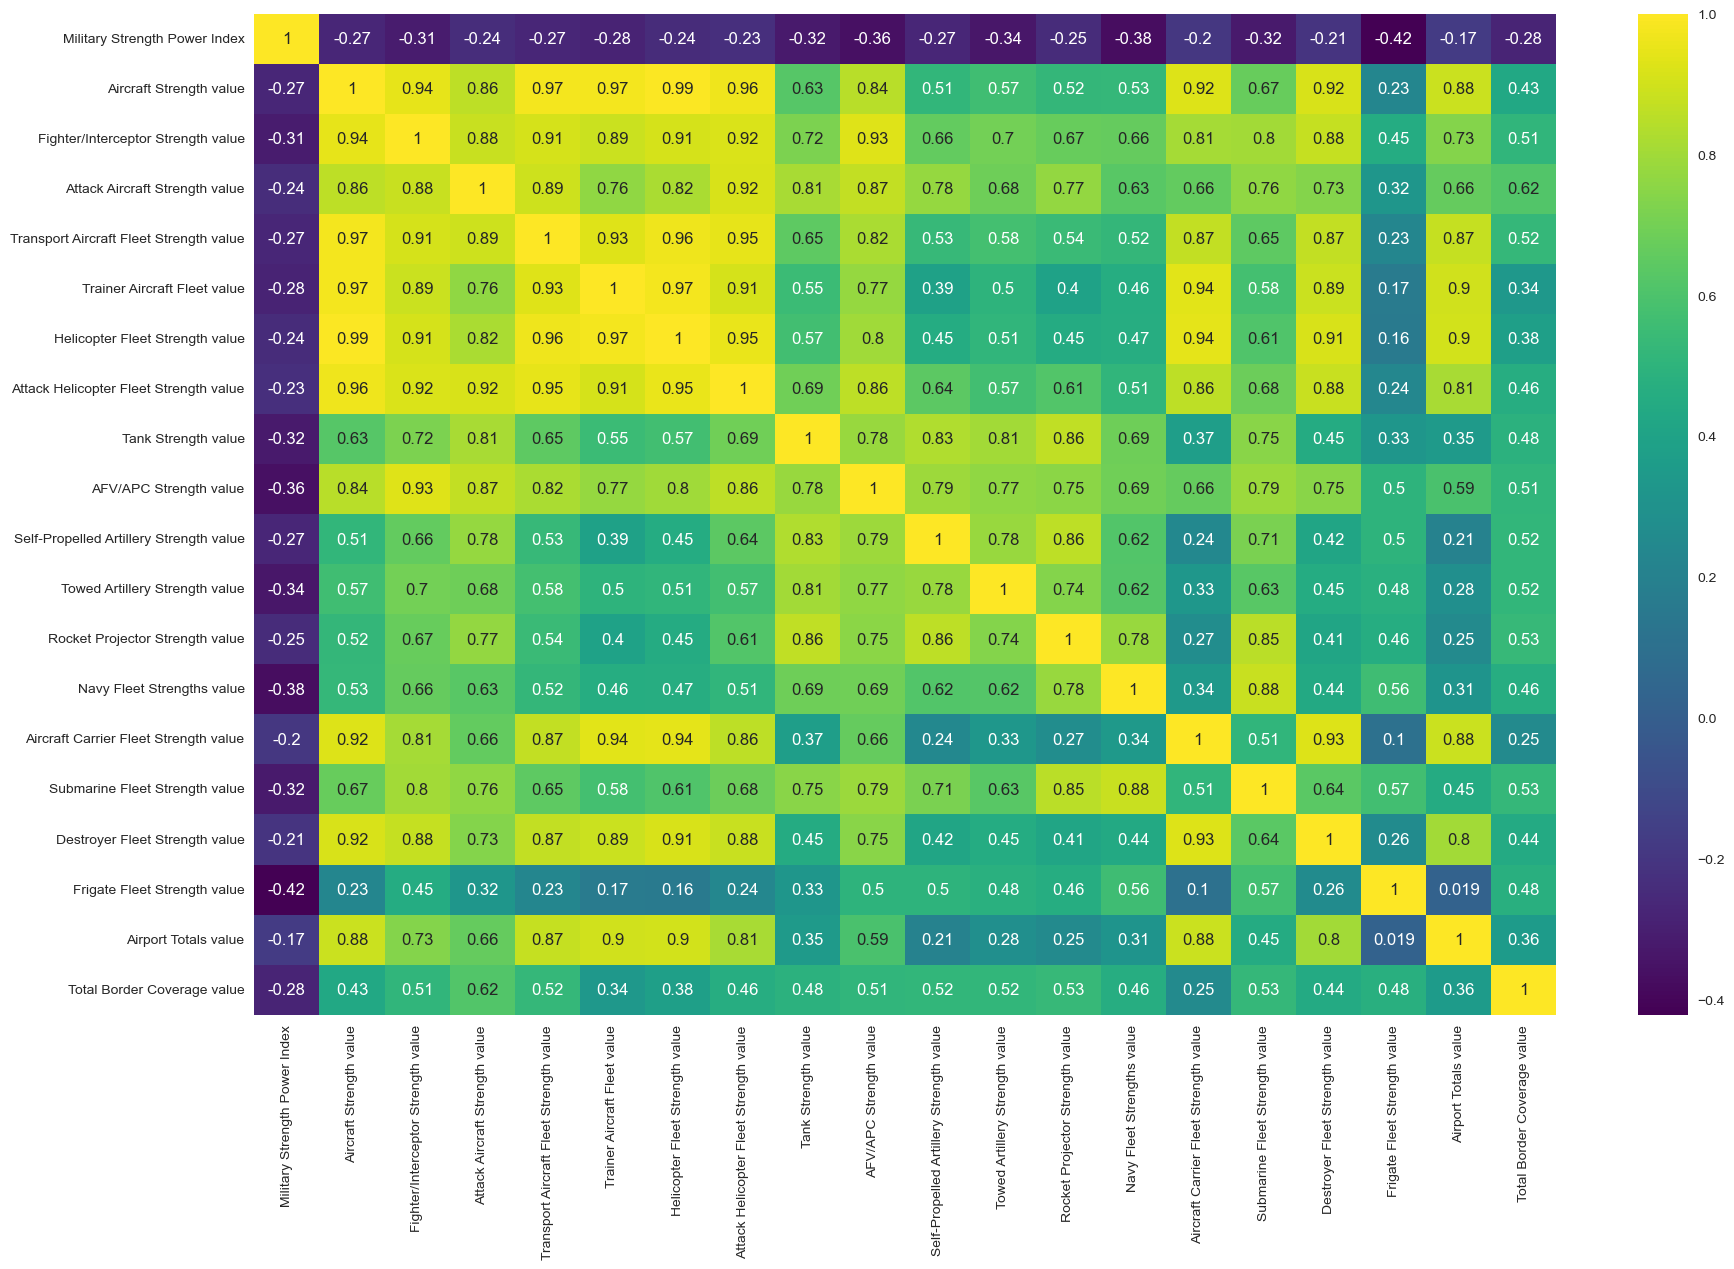

In [72]:
plt.figure(figsize=(21,13))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="viridis");

## Handling missing values and feature engineering

In [50]:
df.rename(columns={"Military Strength":"Country"}, inplace=True)

In [54]:
df.drop(columns = df.iloc[:,2:60:2], inplace = True)

In [55]:
df.sample()

,Country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
29,Cuba,1.221,80,38,0,2,26,14,4,1180,670,100,150,100,12.000,0.000,0.000,0.000,2.000,"50,00,00,000","30,06,00,00,000",133,50000,"1,52,000","12,40,00,000","59,80,621","1,11,16,396","1,10,860",3735,240,29.000


In [57]:
df.to_pickle("df.pkl")

In [73]:
df = pd.read_pickle("df.pkl")

In [74]:
df.isnull().sum()

Country                                     0
Military Strength Power Index               0
Aircraft Strength value                     0
Fighter/Interceptor Strength value          0
Attack Aircraft Strength value              0
Transport Aircraft Fleet Strength value     0
Trainer Aircraft Fleet value                0
Helicopter Fleet Strength value             0
Attack Helicopter Fleet Strength value      0
Tank Strength value                         0
AFV/APC Strength value                      0
Self-Propelled Artillery Strength value     0
Towed Artillery Strength value              0
Rocket Projector Strength value             0
Navy Fleet Strengths value                 14
Aircraft Carrier Fleet Strength value      23
Submarine Fleet Strength value             23
Destroyer Fleet Strength value             23
Frigate Fleet Strength value               23
defense spending budget value               0
External Debt value                         0
Airport Totals value              

In [76]:
df[df["Navy Fleet Strengths value"].isnull()==True]

,Country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
16,Botswana,2.058,45,10,0,11,8,16,0,55,245,0,30,20,NaN,NaN,NaN,NaN,NaN,"45,00,00,000","2,18,70,00,000",74,0,16500,0,"9,62,617","22,49,104","5,81,730",NaN,0,4347.000
19,Burkina Faso,1.901,16,0,3,1,4,8,2,0,350,0,0,0,NaN,NaN,NaN,NaN,NaN,"13,00,00,000","3,05,60,00,000",23,0,10500,0,"78,00,000","1,97,42,715","2,74,200",NaN,0,3611.000
23,Central African Republic,3.289,3,0,0,2,0,1,0,4,55,0,20,0,NaN,NaN,NaN,NaN,NaN,"2,00,00,000","77,99,00,000",39,0,4500,0,"23,48,581","57,45,062","6,22,984",NaN,2800,5920.000
24,Chad,1.638,35,0,6,6,4,17,3,60,372,10,51,10,NaN,NaN,NaN,NaN,NaN,"20,00,00,000","1,72,40,00,000",59,"1,28,000","1,00,000","1,50,00,00,000","60,30,834","1,58,33,116","12,84,000",NaN,0,6406.000
30,Czechia,0.553,95,12,16,8,15,44,15,116,682,86,85,0,NaN,NaN,NaN,NaN,NaN,"2,96,90,00,000","2,05,20,00,00,000",128,2000,"2,00,000","1,50,00,000","50,11,174","1,06,86,269",78867,NaN,664,2046.000
38,Ethiopia,0.858,86,24,0,9,20,33,8,400,114,67,650,183,NaN,NaN,NaN,NaN,NaN,"35,00,00,000","26,05,00,00,000",57,0,55000,"4,28,000","4,11,43,474","10,83,86,391","11,04,300",NaN,"1,04,300",5925.000
48,Hungary,0.822,47,12,0,5,6,24,8,30,944,0,300,0,NaN,NaN,NaN,NaN,NaN,"2,08,00,00,000","1,38,10,00,00,000",41,14000,"1,45,000","2,51,00,000","46,18,081","98,25,704","1,03,000",NaN,1622,2106.000
62,Kyrgyzstan,1.924,5,0,0,0,0,5,2,150,385,30,141,21,NaN,NaN,NaN,NaN,NaN,"2,00,00,000","8,16,40,00,000",28,1000,17200,"4,00,00,000","30,29,935","58,49,296","1,99,951",NaN,600,4573.000
71,Mali,1.894,29,9,0,6,5,8,6,80,248,0,50,32,NaN,NaN,NaN,NaN,NaN,"7,00,00,000","4,19,20,00,000",25,0,5500,0,"59,91,557","1,84,29,893","12,40,192",NaN,0,7908.000
74,Moldova,2.129,3,0,0,1,0,2,0,0,341,9,52,11,NaN,NaN,NaN,NaN,NaN,"3,00,00,000","6,54,90,00,000",7,0,16320,0,"20,14,503","34,37,720",33851,NaN,558,1885.000


In [78]:
df.fillna(0, inplace=True)

In [86]:
df.select_dtypes("object").head()

,Country,defense spending budget value,External Debt value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value
0,Afghanistan,"12,00,00,00,000","2,84,00,00,000",0,5500,0,"1,43,25,743","3,49,40,837","6,52,230",0,1200
1,Albania,"25,00,00,000","9,50,50,00,000",16000,42500,"16,83,00,000","15,19,438","30,57,220",28748,362,41
2,Algeria,"13,00,00,00,000","6,26,00,00,000","13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998,0
3,Angola,"7,00,00,00,000","42,08,00,00,000","16,66,000",82300,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600,1300
4,Argentina,"4,20,00,00,000","2,14,90,00,00,000","4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989,11000


In [92]:
for col in df.select_dtypes("object").columns[1:]:
    df[col] = df[col].astype("str") 
    df[col] = df[col].str.replace(",", "")  
    df[col] = df[col].astype("float")  


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Country                                  138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength value                  138 non-null    int64  
 3   Fighter/Interceptor Strength value       138 non-null    int64  
 4   Attack Aircraft Strength value           138 non-null    int64  
 5   Transport Aircraft Fleet Strength value  138 non-null    int64  
 6   Trainer Aircraft Fleet value             138 non-null    int64  
 7   Helicopter Fleet Strength value          138 non-null    int64  
 8   Attack Helicopter Fleet Strength value   138 non-null    int64  
 9   Tank Strength value                      138 non-null    int64  
 10  AFV/APC Strength value                   138 non-n

## Data Visualization

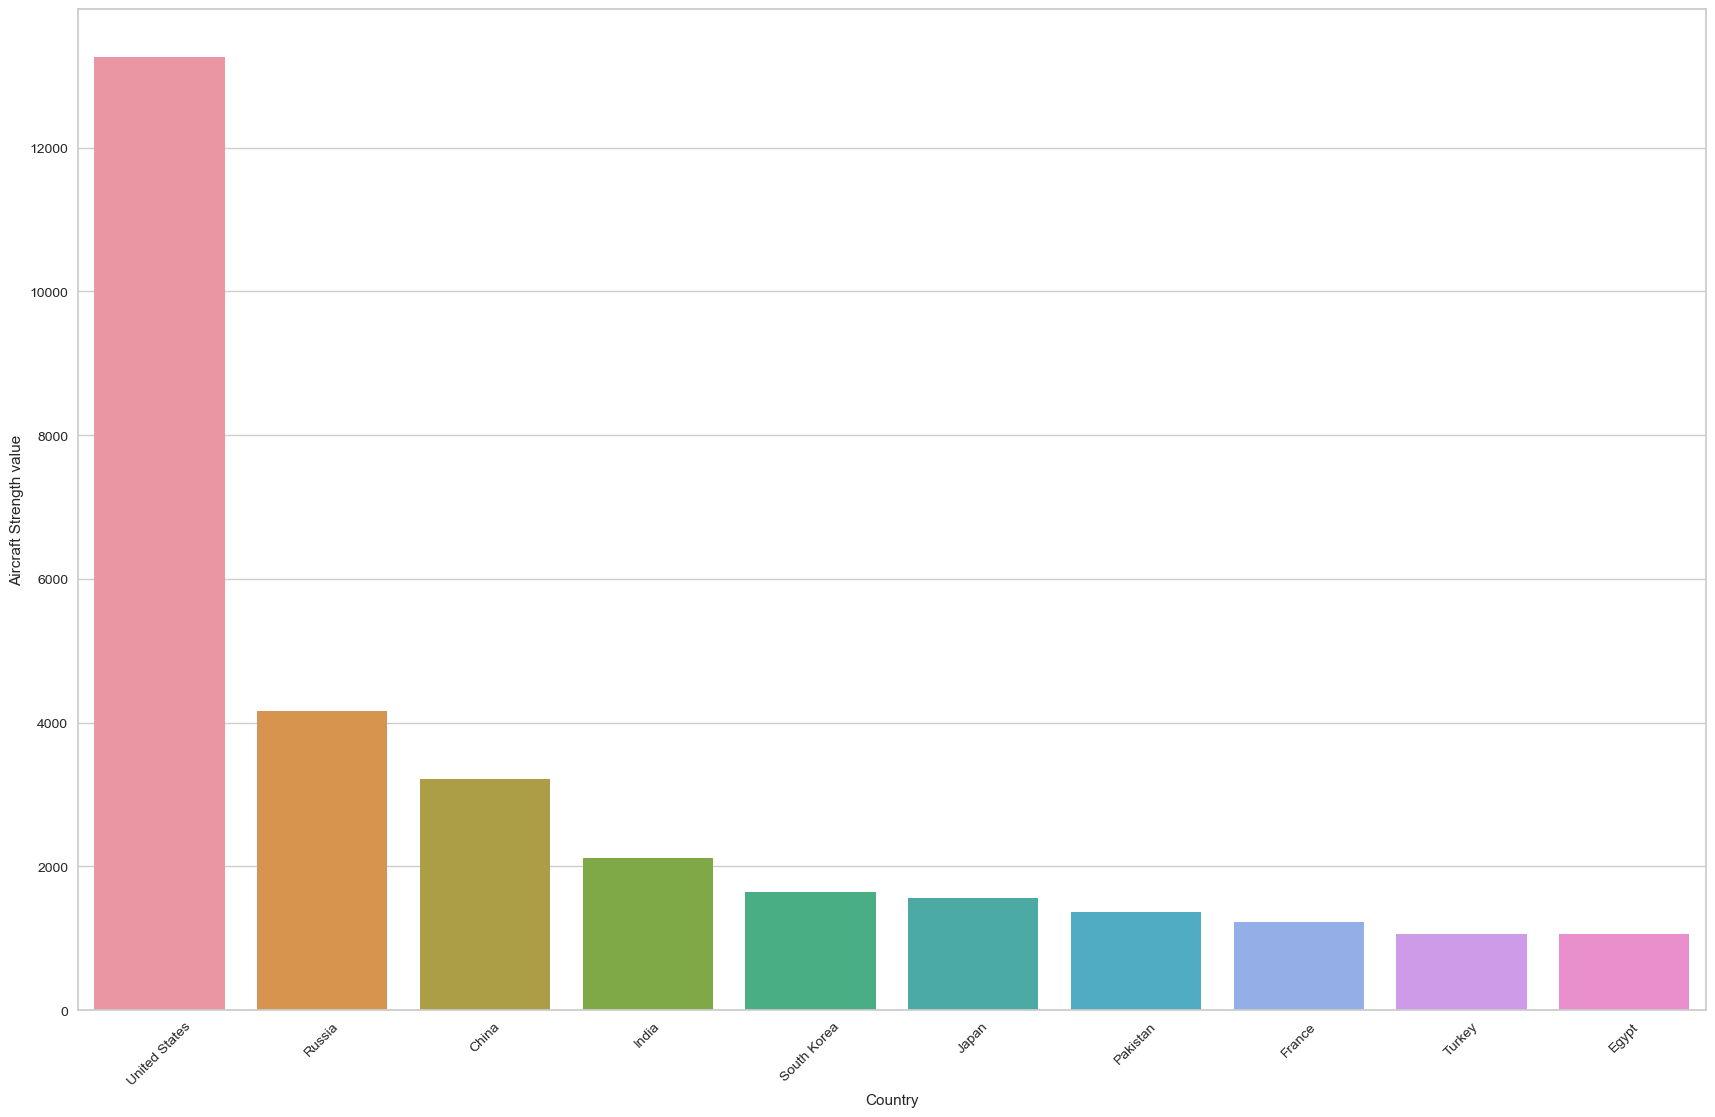

In [109]:

sorted_df = df.sort_values(by="Aircraft Strength value", ascending=False)

top_10_df = sorted_df.head(10)

plt.figure(figsize=(21, 13))
plt.xticks(rotation=45)
sns.barplot(x=top_10_df["Country"], y=top_10_df["Aircraft Strength value"])

plt.show()


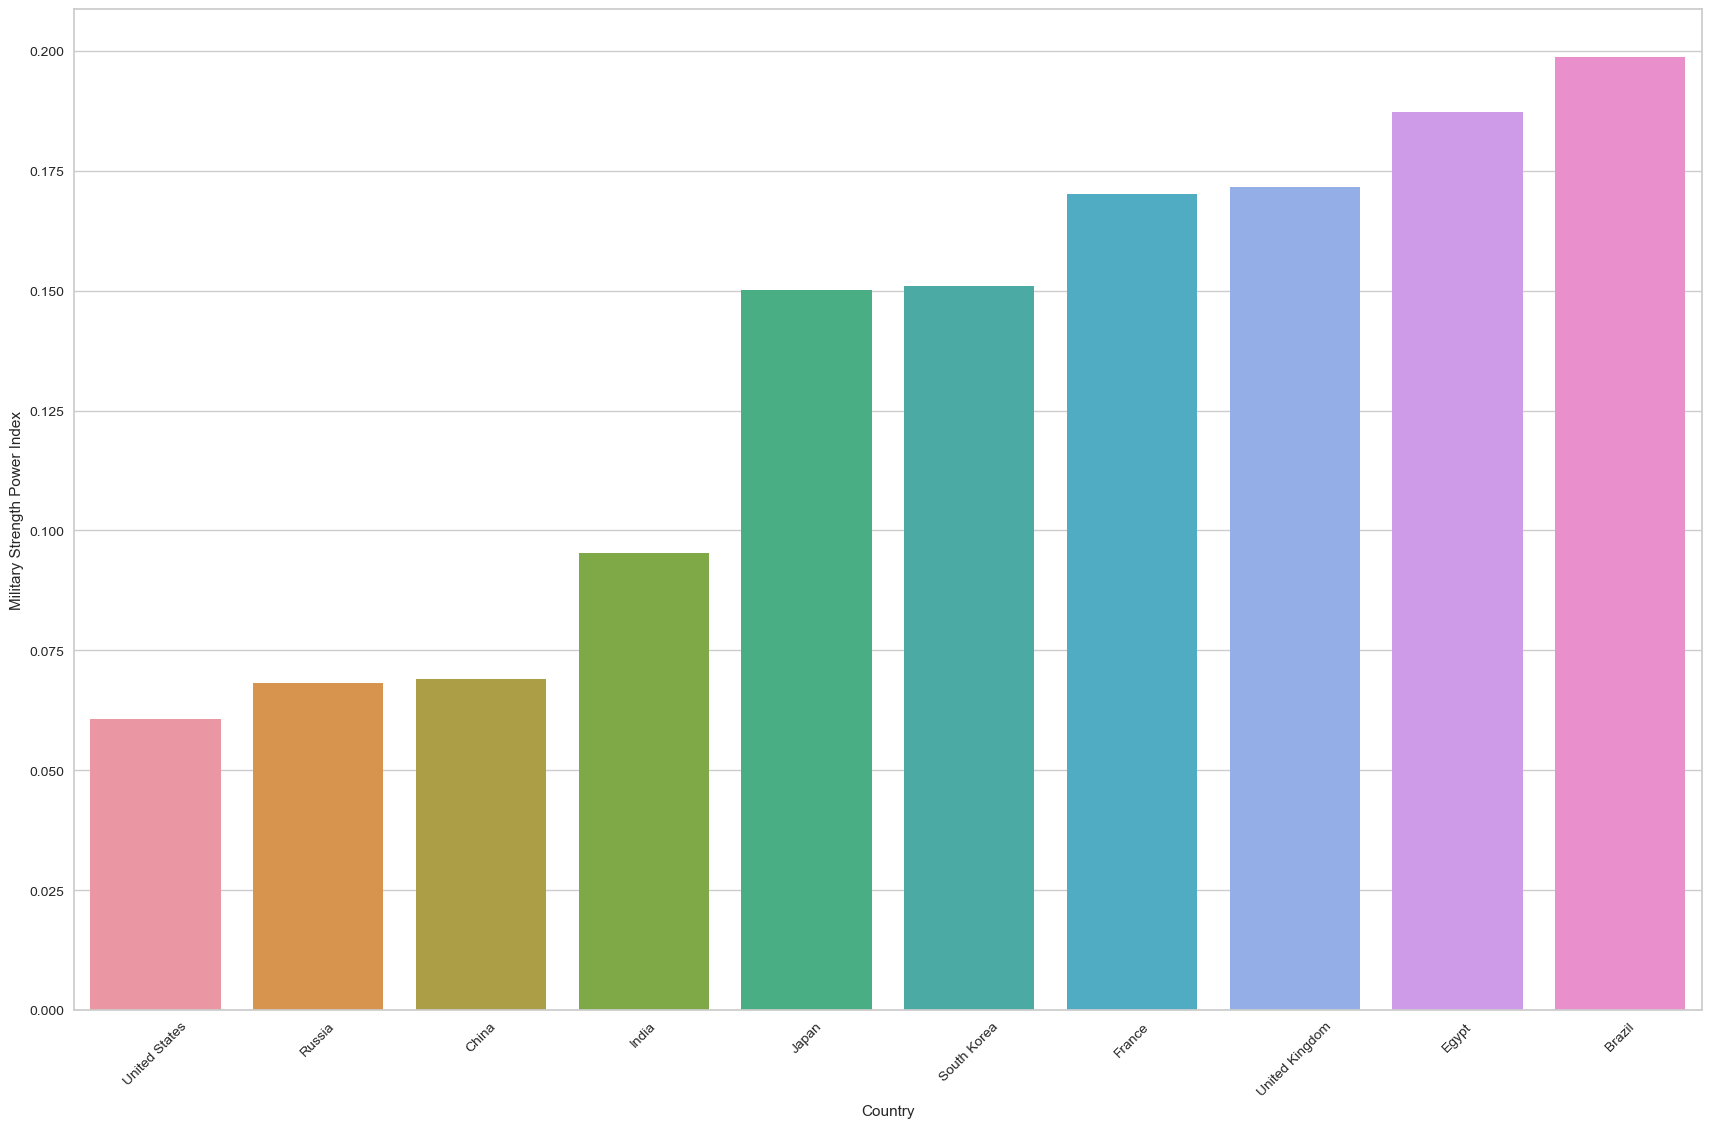

In [113]:
sorted_df = df.sort_values(by="Military Strength Power Index",ascending=True).head(10)

plt.figure(figsize=(21, 13))
plt.xticks(rotation=45)
sns.barplot(x=sorted_df["Country"], y=sorted_df["Military Strength Power Index"]);

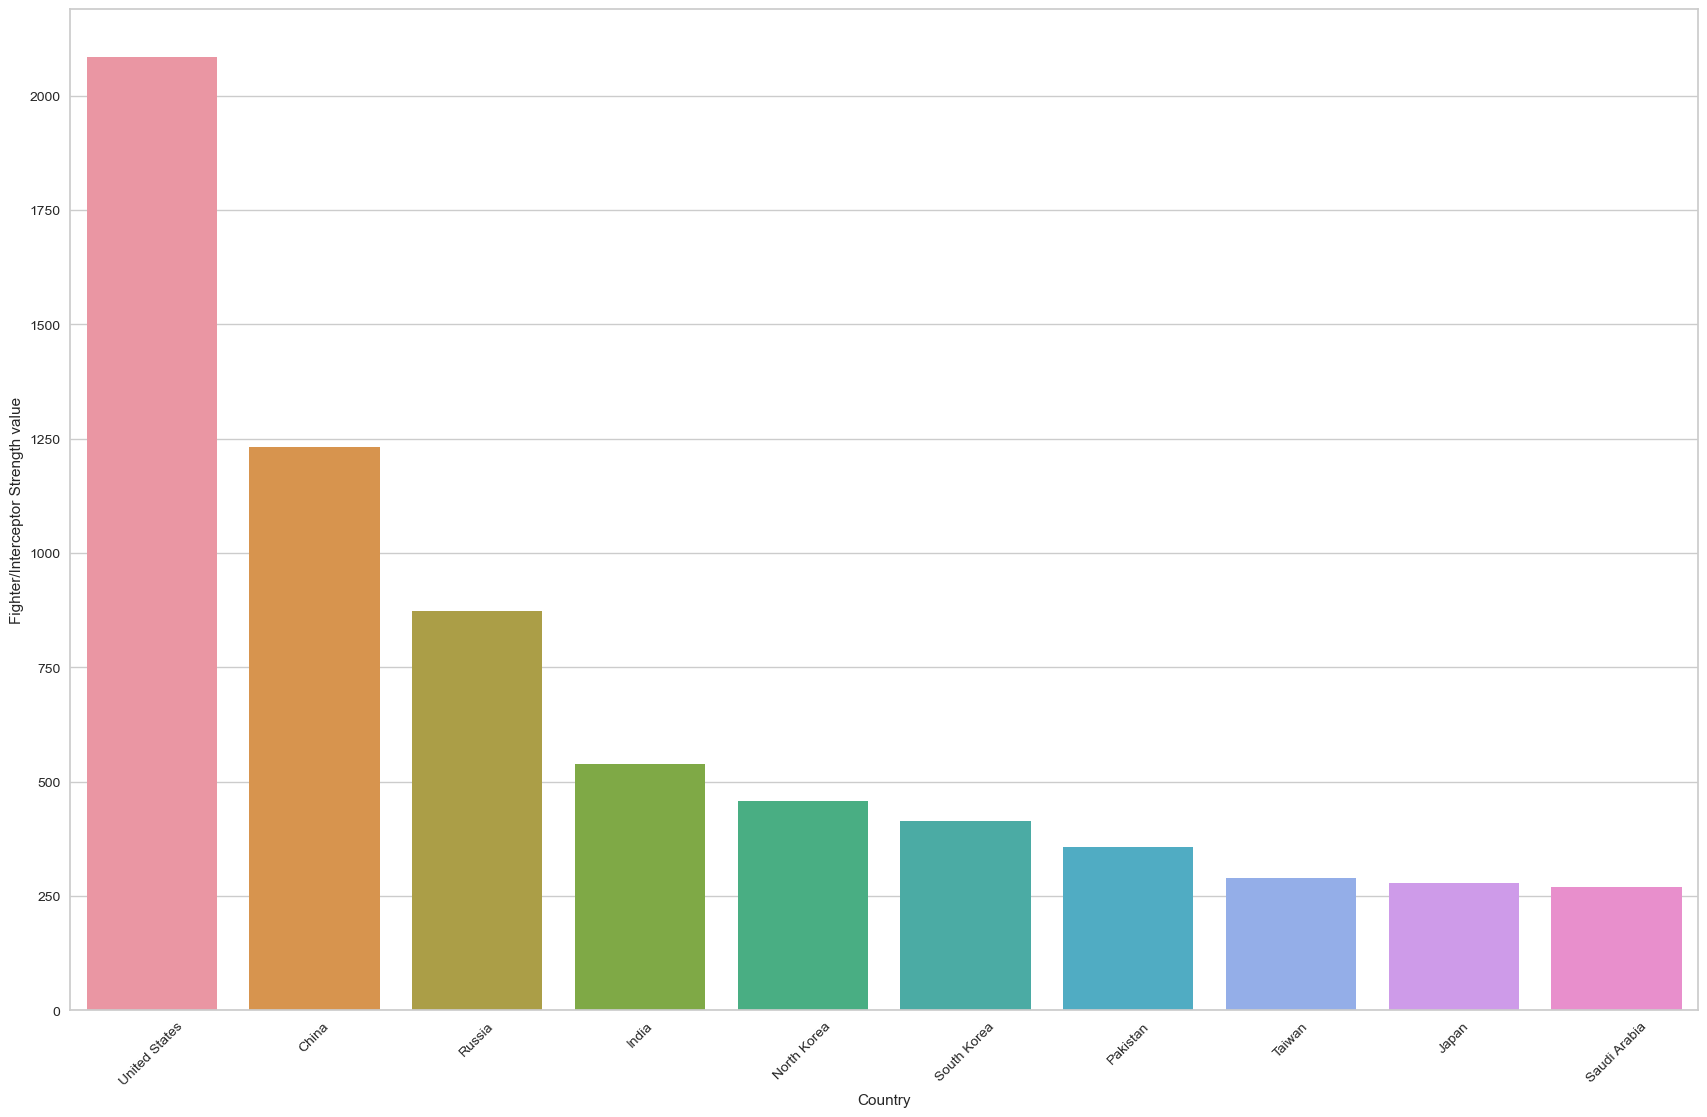

In [114]:
sorted_df = df.sort_values(by="Fighter/Interceptor Strength value",ascending=False).head(10)

plt.figure(figsize=(21, 13))
plt.xticks(rotation=45)
sns.barplot(x=sorted_df["Country"], y=sorted_df["Fighter/Interceptor Strength value"]);

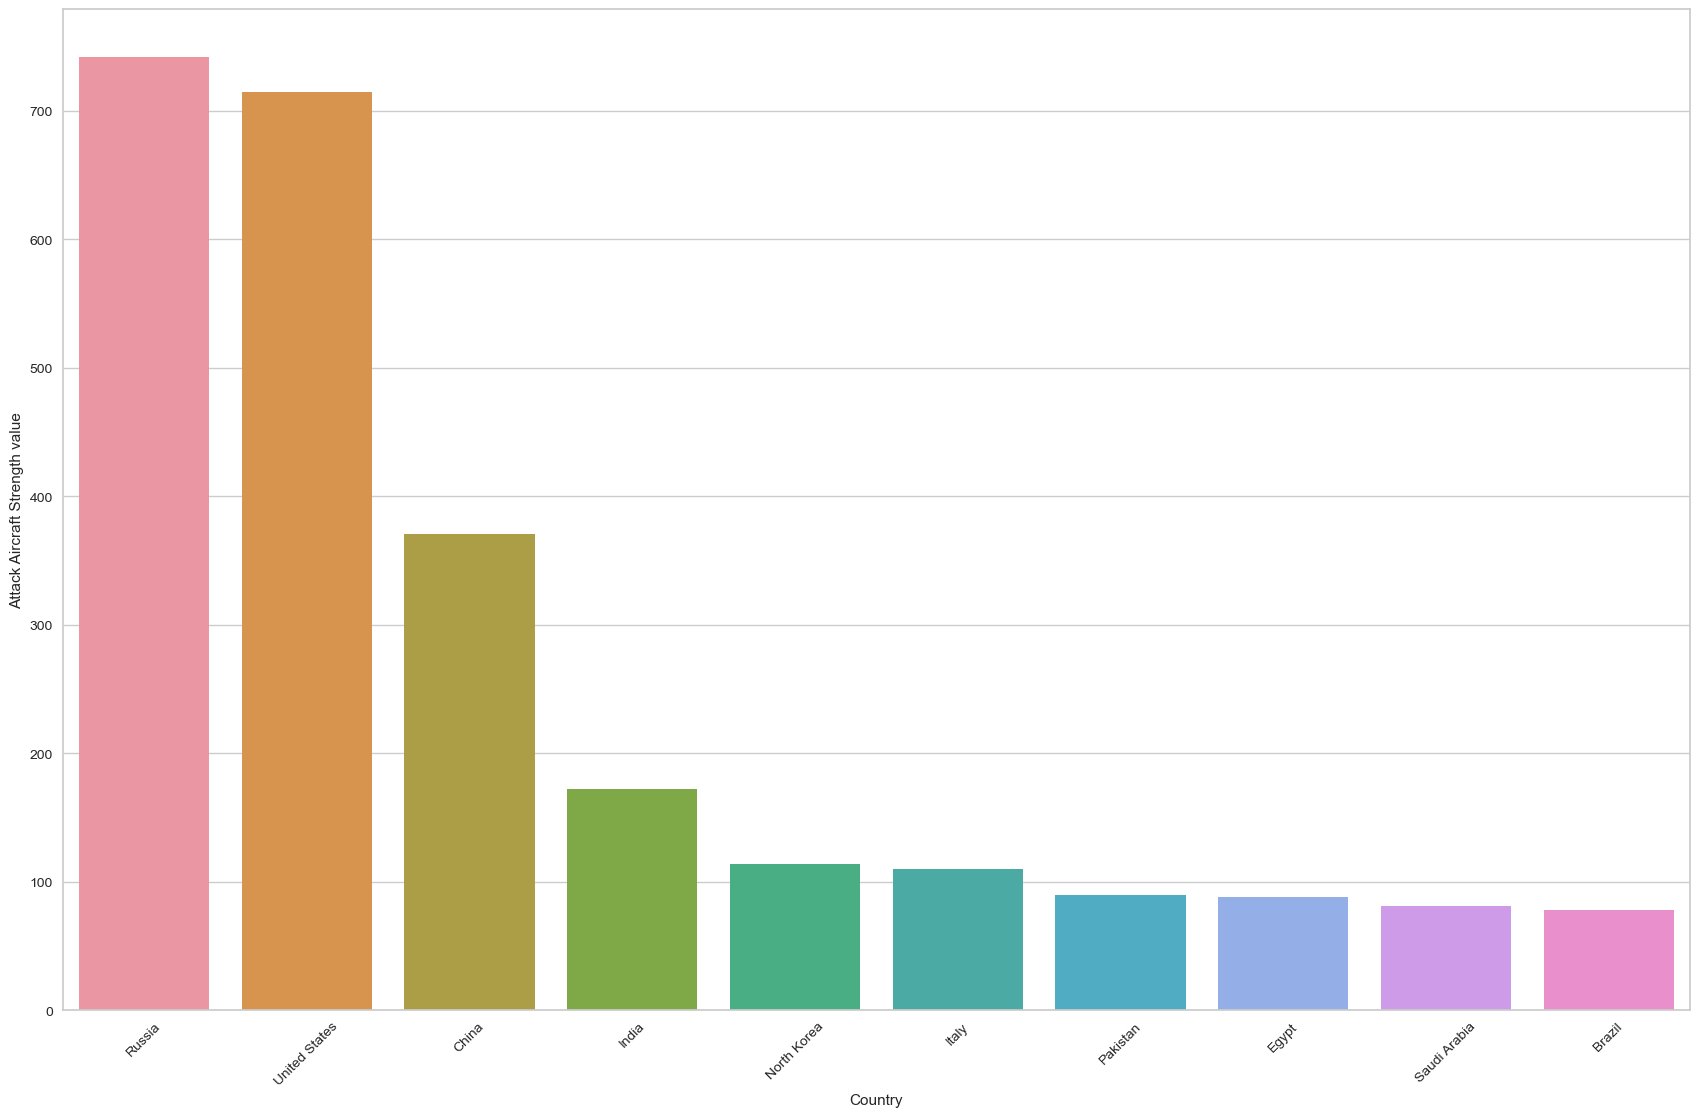

In [115]:
sorted_df = df.sort_values(by="Attack Aircraft Strength value",ascending=False).head(10)

plt.figure(figsize=(21, 13))
plt.xticks(rotation=45)
sns.barplot(x=sorted_df["Country"], y=sorted_df["Attack Aircraft Strength value"]);

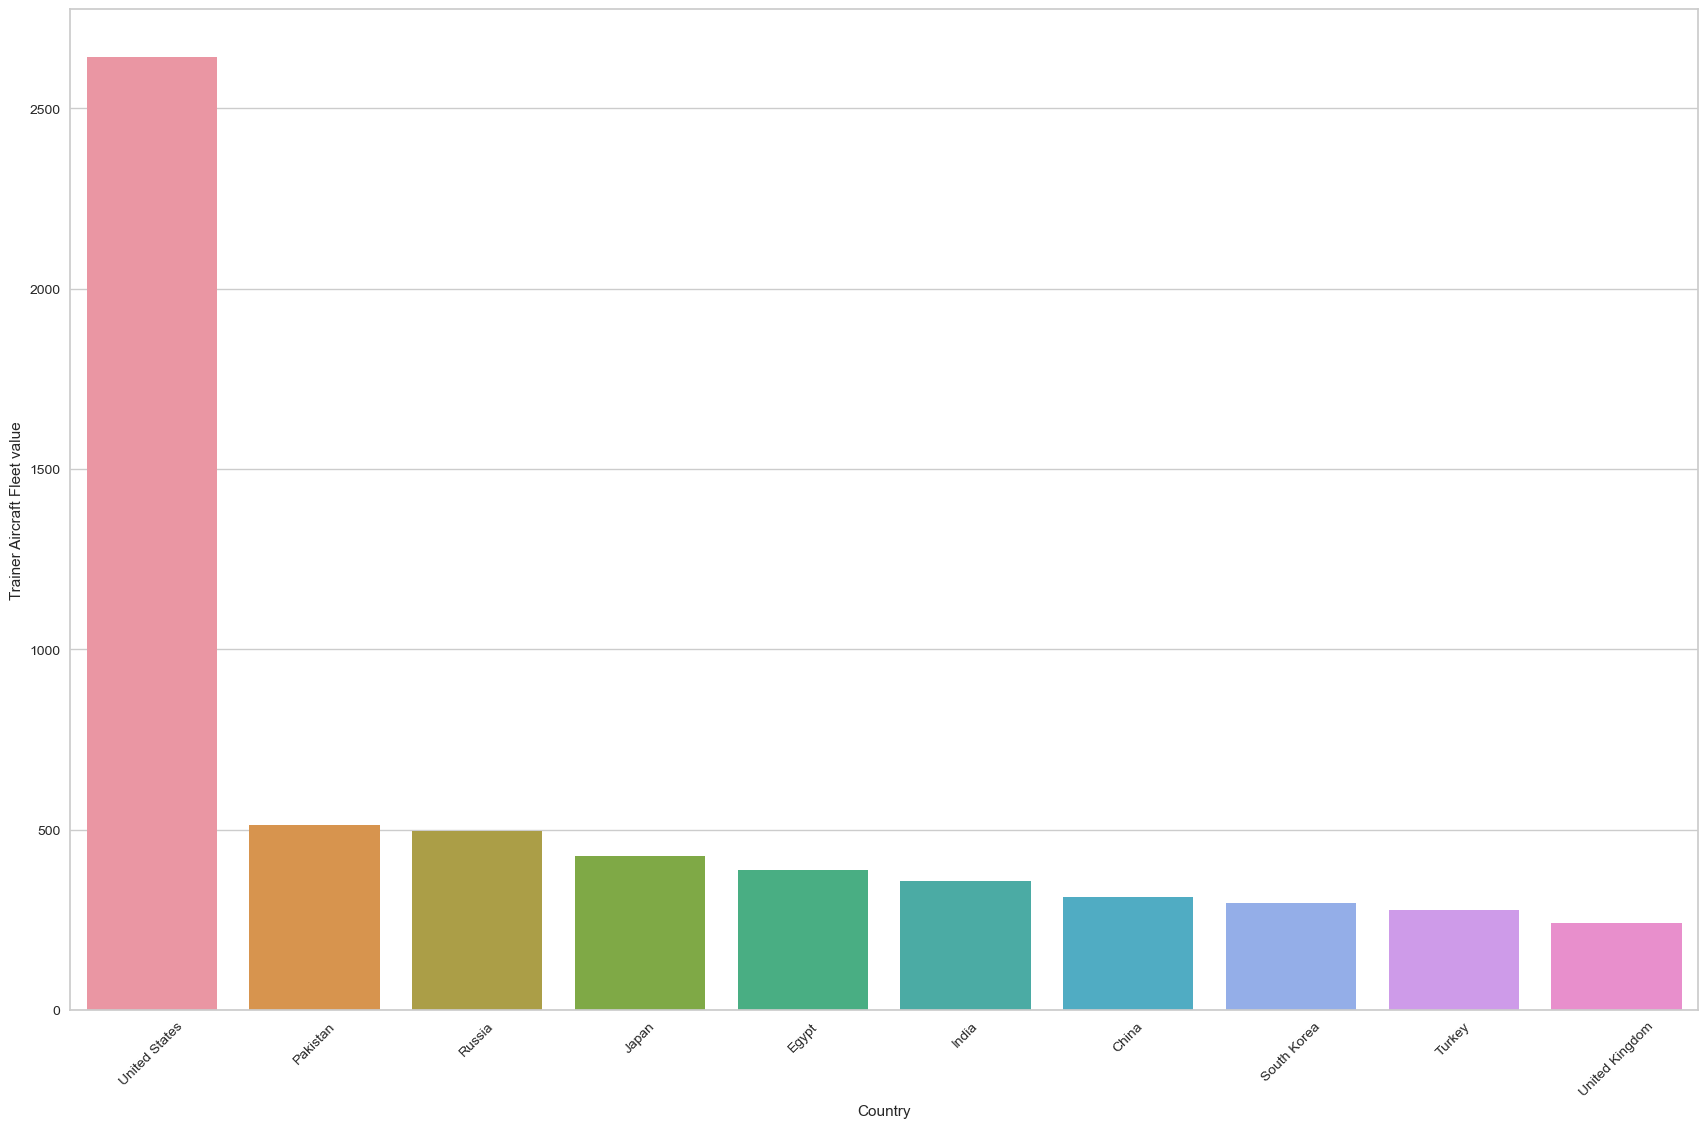

In [117]:
sorted_df = df.sort_values(by="Trainer Aircraft Fleet value",ascending=False).head(10)

plt.figure(figsize=(21, 13))
plt.xticks(rotation=45)
sns.barplot(x=sorted_df["Country"], y=sorted_df["Trainer Aircraft Fleet value"]);

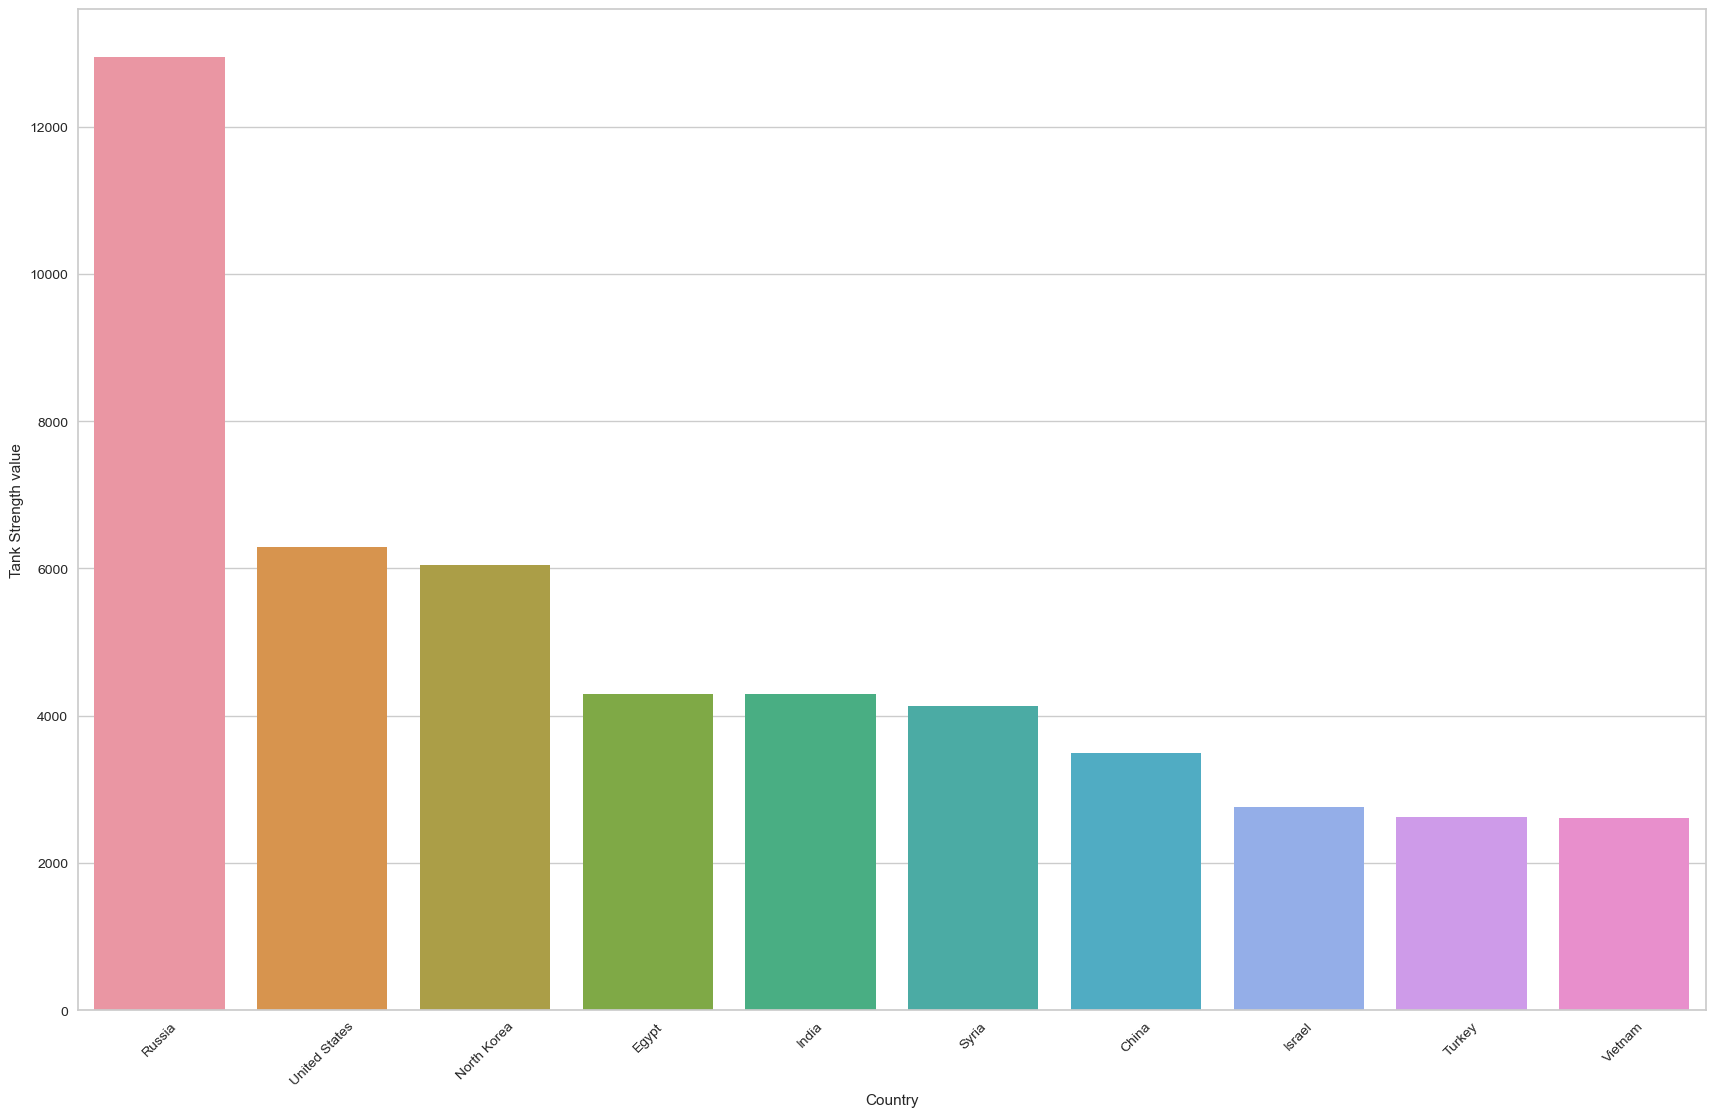

In [118]:
sorted_df = df.sort_values(by="Tank Strength value",ascending=False).head(10)

plt.figure(figsize=(21, 13))
plt.xticks(rotation=45)
sns.barplot(x=sorted_df["Country"], y=sorted_df["Tank Strength value"]);

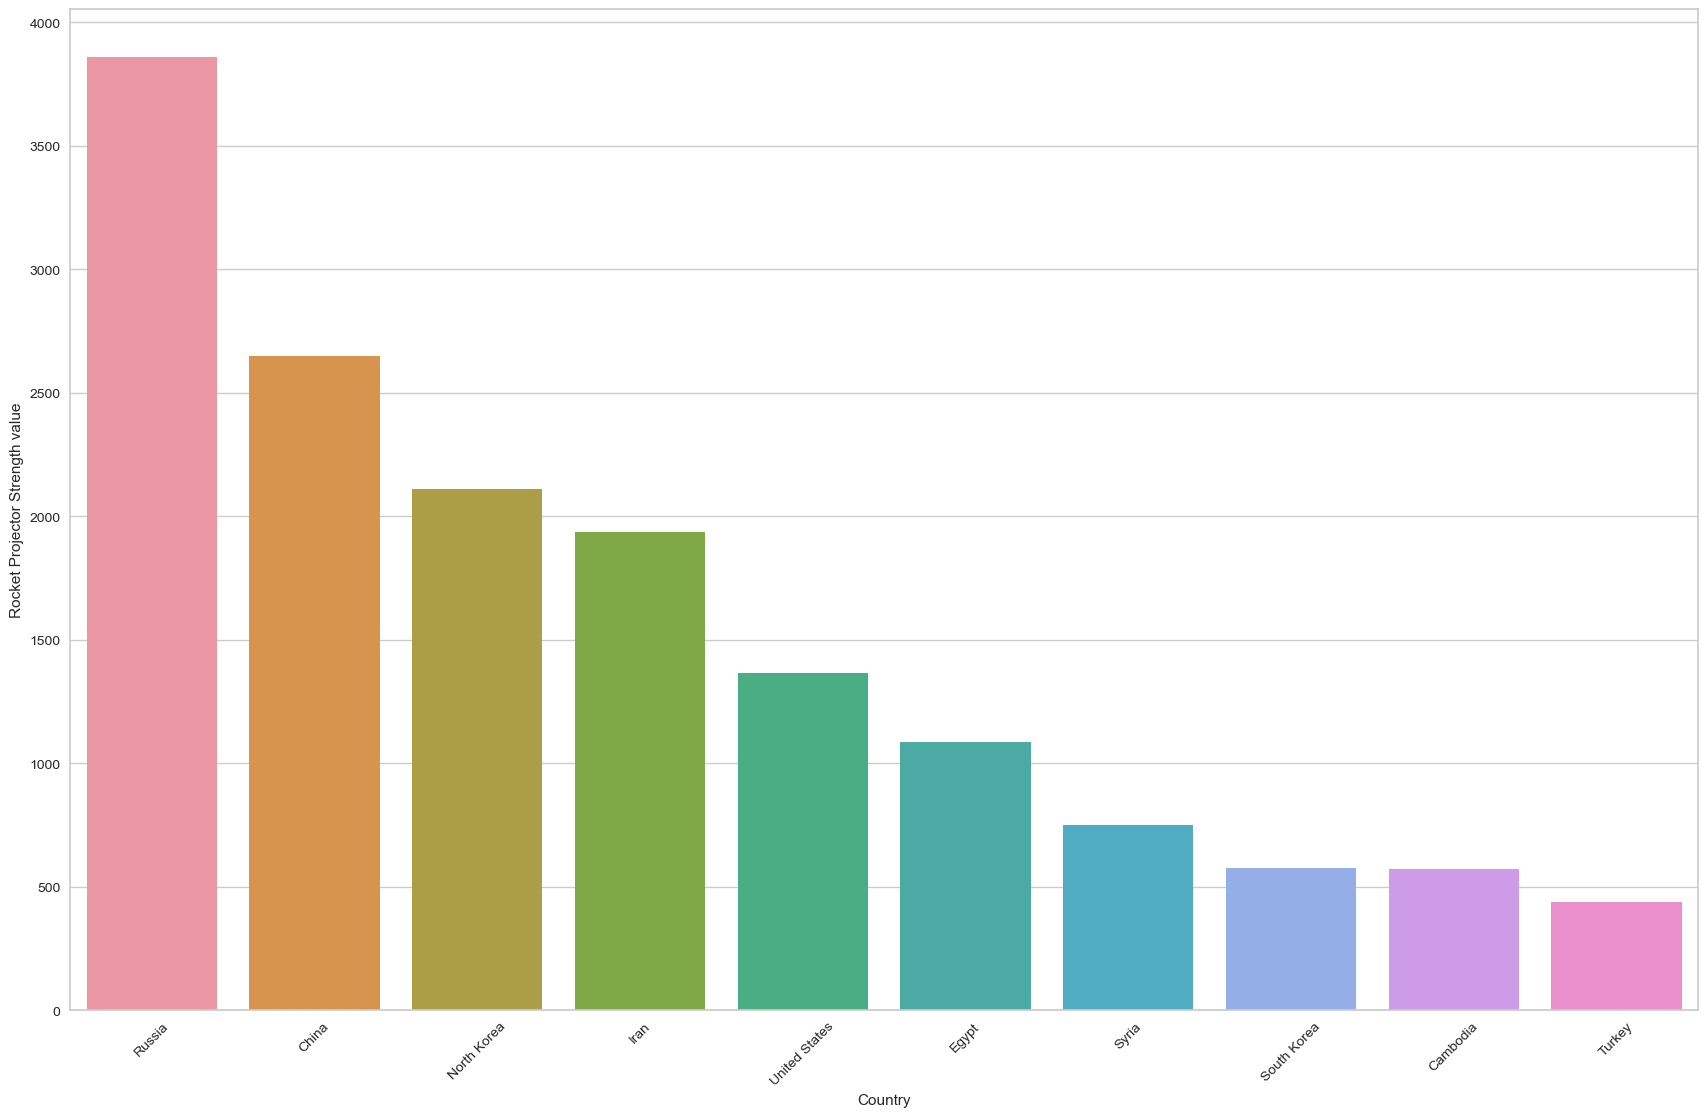

In [119]:
sorted_df = df.sort_values(by="Rocket Projector Strength value",ascending=False).head(10)

plt.figure(figsize=(21, 13))
plt.xticks(rotation=45)
sns.barplot(x=sorted_df["Country"], y=sorted_df["Rocket Projector Strength value"]);

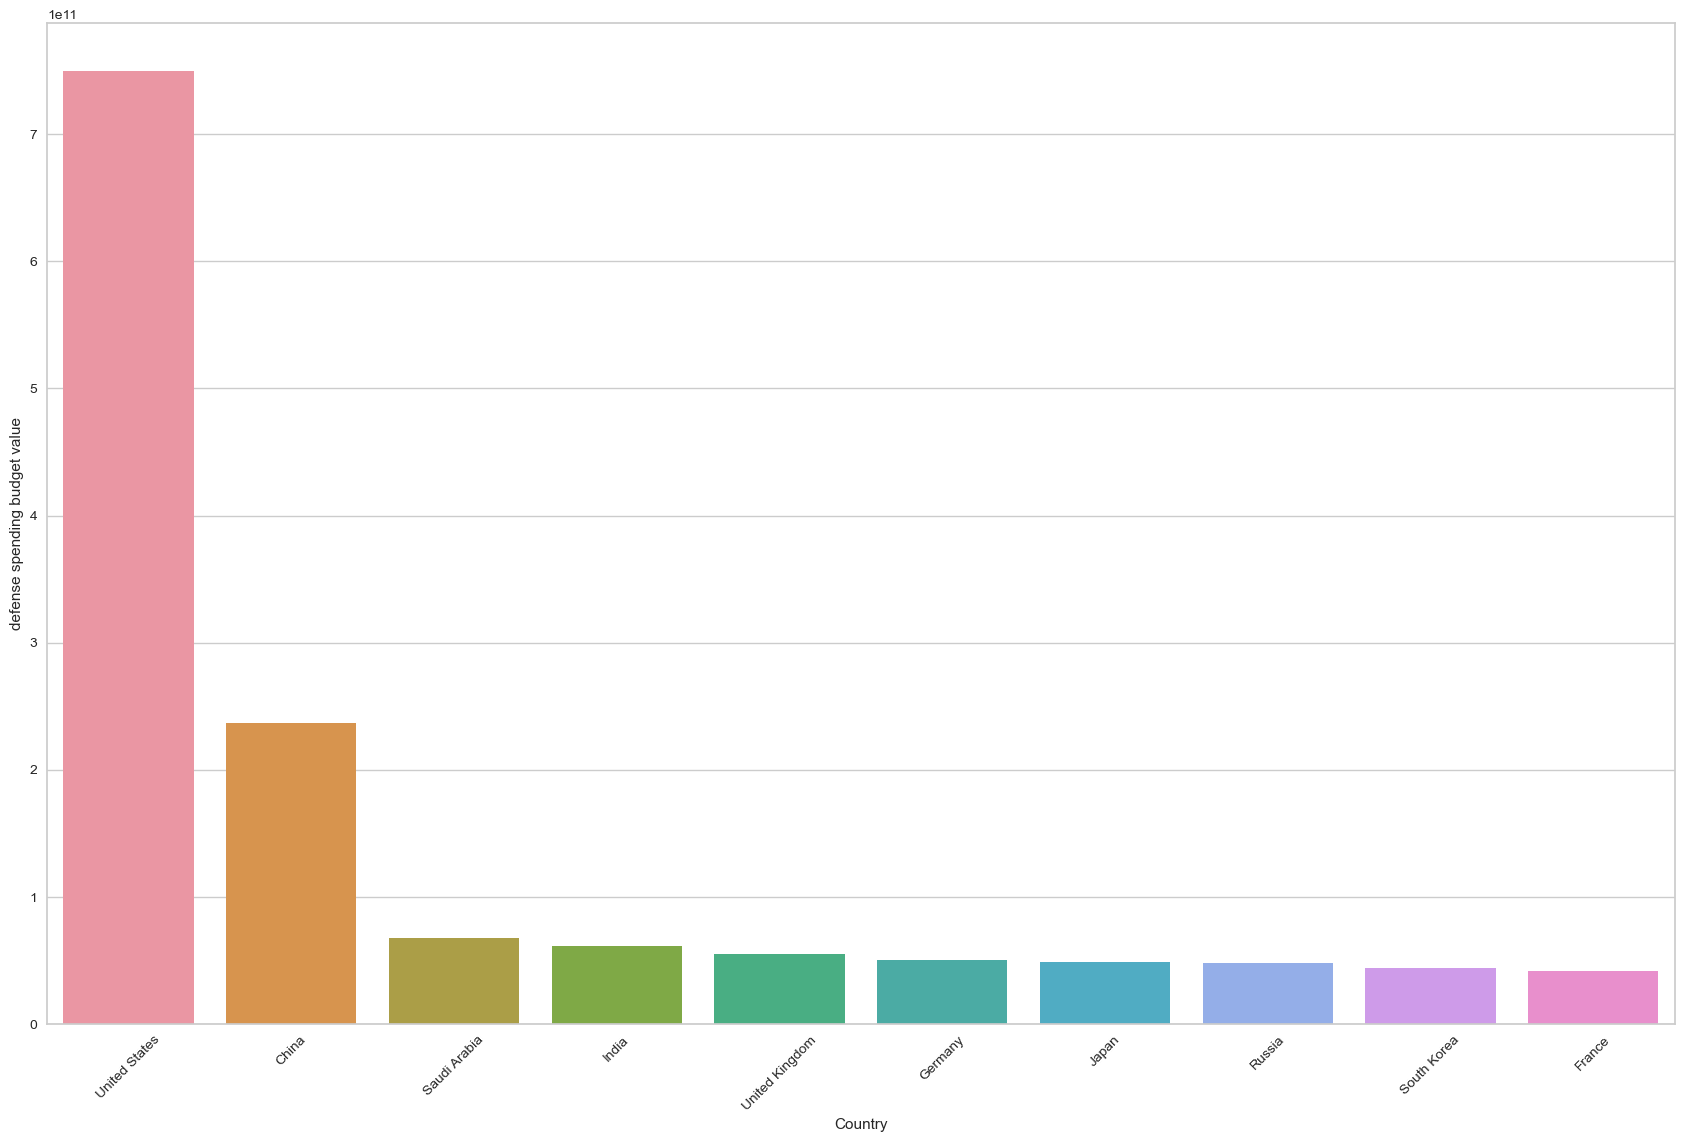

In [120]:
sorted_df = df.sort_values(by="defense spending budget value",ascending=False).head(10)

plt.figure(figsize=(21, 13))
plt.xticks(rotation=45)
sns.barplot(x=sorted_df["Country"], y=sorted_df["defense spending budget value"]);

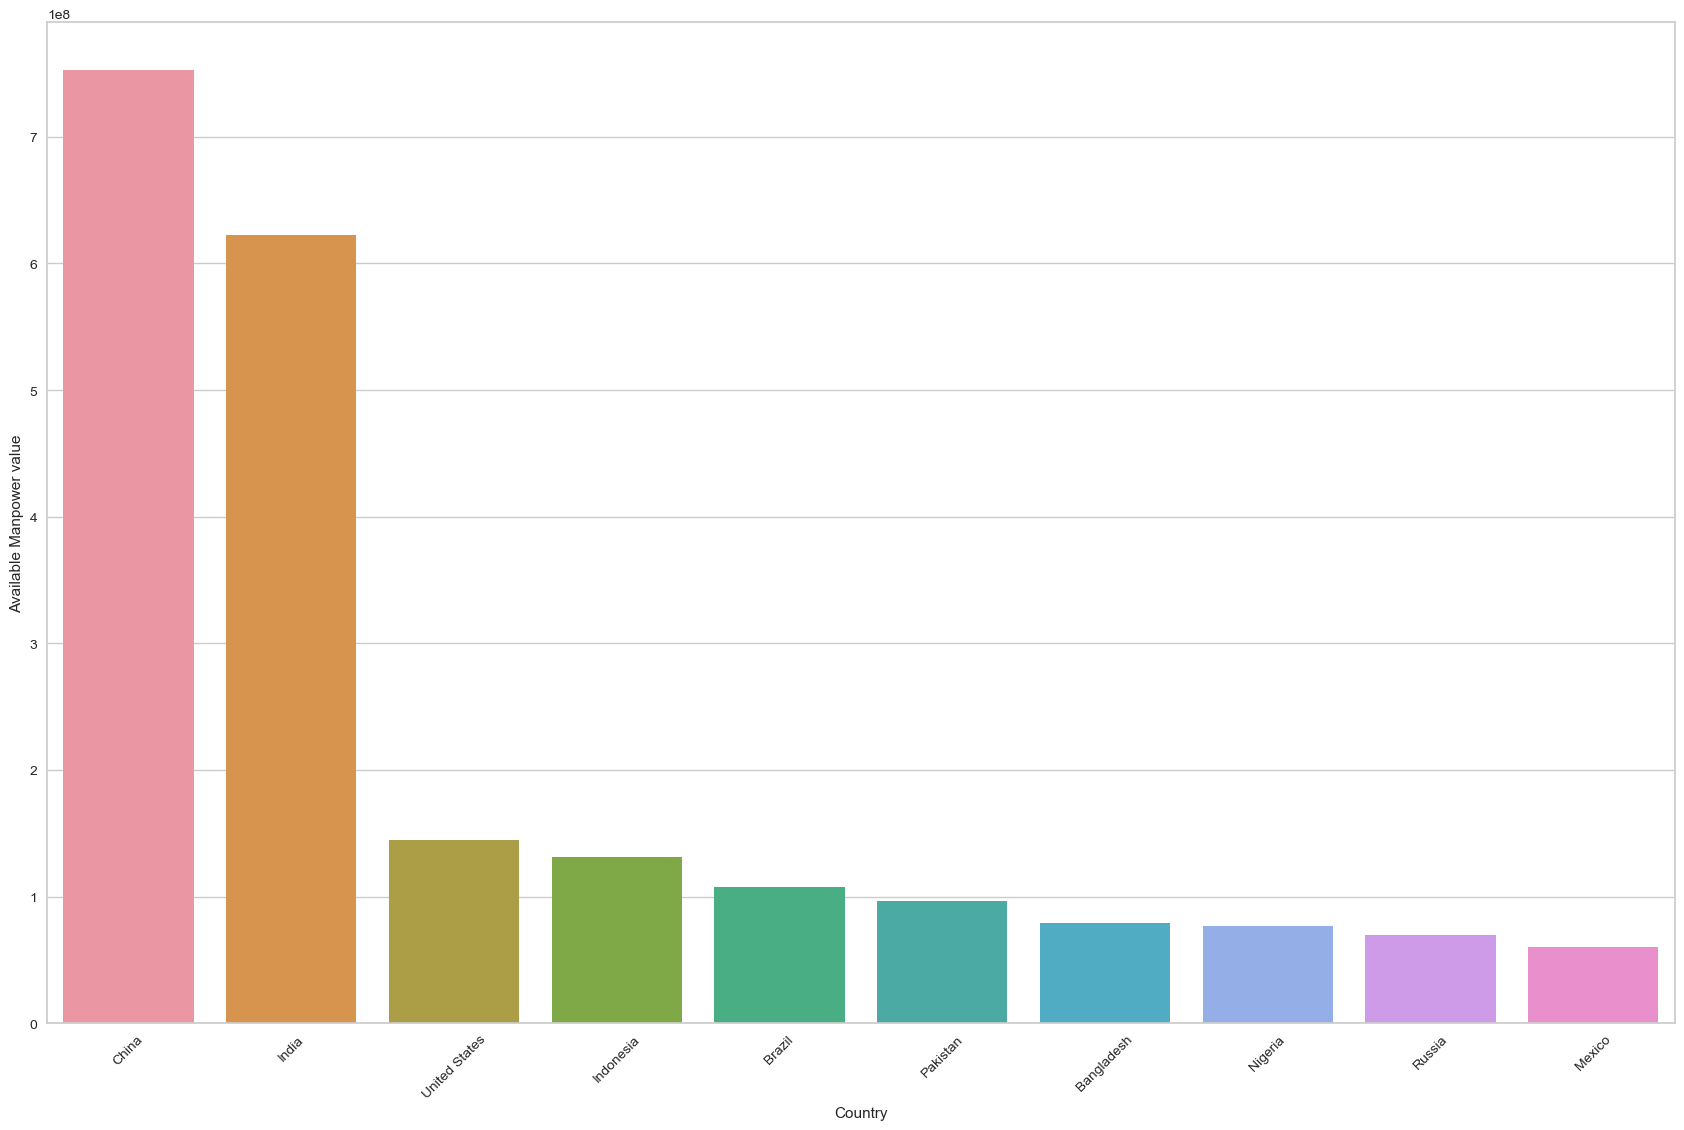

In [121]:
sorted_df = df.sort_values(by="Available Manpower value",ascending=False).head(10)

plt.figure(figsize=(21, 13))
plt.xticks(rotation=45)
sns.barplot(x=sorted_df["Country"], y=sorted_df["Available Manpower value"]);

In [122]:
df.to_pickle("dff.pkl")

In [147]:
df = pd.read_pickle("dff.pkl")

In [148]:
df = df.drop("Country",axis=1)

## Modelling

In [149]:
model = KMeans(4)
model.fit(df)

KMeans(n_clusters=4)

In [150]:
prediction = model.predict(df)
prediction

array([0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0,
       0, 0, 0, 0, 0, 0])

In [151]:
df["cluster"] = prediction
df.sample(5)

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,cluster
63,3.443,33,0,0,2,4,27,0,65,30,0,62,0,36.000,0.000,0.000,0.000,0.000,18500000.000,14900000000.000,41,0.000,4500.000,0.000,3248143.000,7234171.000,236800.000,0.000,4600.000,5274.000,0
28,1.018,78,12,0,0,27,47,0,72,604,24,151,105,28.000,0.000,0.000,0.000,0.000,800000000.000,48100000000.000,69,14000.000,82000.000,71000000.000,2088265.000,4270480.000,56594.000,5835.000,785.000,2237.000,0
9,1.855,109,17,0,2,37,65,22,180,843,33,26,17,39.000,0.000,0.000,0.000,1.000,1415000000.000,52150000000.000,4,45000.000,55000.000,124600000.000,806505.000,1422659.000,760.000,161.000,0.000,0.000,0
26,0.069,3210,1232,371,224,314,911,281,3500,33000,3800,3600,2650,777.000,2.000,74.000,36.000,52.000,237000000000.000,1598000000000.000,507,3838000.000,13500000.000,25620000000.000,752855402.000,1384688986.000,9596961.000,14500.000,110000.000,22457.000,3
116,0.530,204,71,0,6,69,53,0,126,1036,88,0,0,63.000,0.000,5.000,0.000,0.000,6326923600.000,939900000000.000,231,0.000,320000.000,0.000,4116808.000,10040995.000,450295.000,3218.000,2052.000,2211.000,0


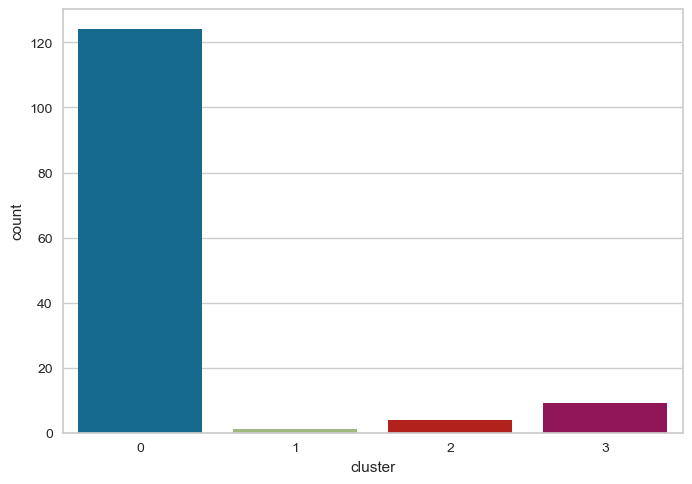

In [152]:
sns.countplot(x=df["cluster"]);

In [153]:
df[df.cluster==0]

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,cluster
0,1.344,260,0,25,30,0,187,0,0,1062,0,176,50,0.000,0.000,0.000,0.000,0.000,12000000000.000,2840000000.000,43,0.000,5500.000,0.000,14325743.000,34940837.000,652230.000,0.000,1200.000,5987.000,0
1,2.314,19,0,0,0,0,19,0,0,467,0,0,0,38.000,0.000,0.000,0.000,0.000,250000000.000,9505000000.000,4,16000.000,42500.000,168300000.000,1519438.000,3057220.000,28748.000,362.000,41.000,691.000,0
2,0.466,551,103,22,59,87,257,45,880,7361,320,240,316,201.000,0.000,6.000,0.000,5.000,13000000000.000,6260000000.000,157,1306000.000,325000.000,12200000000.000,20741263.000,41657488.000,2381741.000,998.000,0.000,6734.000,0
3,0.838,295,72,18,30,47,126,15,379,595,28,357,115,57.000,0.000,0.000,0.000,0.000,7000000000.000,42080000000.000,176,1666000.000,82300.000,8273000000.000,6244205.000,30355880.000,1246700.000,1600.000,1300.000,5369.000,0
4,0.652,227,24,7,9,64,100,0,370,739,83,172,26,49.000,0.000,2.000,4.000,0.000,4200000000.000,214900000000.000,1138,479400.000,685000.000,2185000000.000,20179430.000,44694198.000,2780400.000,4989.000,11000.000,11968.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,0.645,260,38,0,52,82,86,10,390,600,73,104,36,49.000,0.000,2.000,0.000,4.000,745000000.000,100300000000.000,444,2007000.000,575000.000,300900000000.000,14260129.000,31689176.000,912050.000,2800.000,7100.000,5267.000,0
134,0.356,293,77,0,38,36,138,25,2615,2530,70,1000,85,65.000,0.000,6.000,0.000,9.000,5500000000.000,96580000000.000,45,271400.000,525000.000,4400000000.000,51043216.000,97040334.000,331210.000,3444.000,17702.000,4616.000,0
135,1.241,169,77,0,8,21,61,14,620,615,20,85,150,30.000,0.000,0.000,0.000,0.000,1400000000.000,7068000000.000,57,12260.000,145000.000,3000000000.000,11266221.000,28667230.000,527968.000,1906.000,0.000,1601.000,0
136,1.646,108,18,0,11,52,27,0,75,184,0,42,50,0.000,0.000,0.000,0.000,0.000,40000000.000,11660000000.000,88,0.000,21000.000,0.000,6166905.000,16445079.000,752618.000,0.000,2250.000,6043.000,0


In [154]:
df[df.cluster==1]

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,cluster
130,0.061,13264,2085,715,945,2643,5768,967,6289,39253,1465,2740,1366,490.000,20.000,66.000,91.000,0.000,750000000000.000,17910000000000.000,13513,9352000.000,20000000.000,36520000000.000,144872845.000,329256465.000,9826675.000,19924.000,41009.000,12048.000,1


In [155]:
silhouette_score(df,prediction)

0.8671436271439987

In [156]:
wcss = [] #within cluster sum of squares
ss = []
for i in range(2, 11):
    model = KMeans(i)
    model = model.fit(df)
    predictions = model.predict(df)
    ss1 = silhouette_score(df, predictions)
    ss.append(ss1)
    print(ss1)
    wcss.append(model.inertia_)

0.9227153206136329
0.8995442950361631
0.8713120561169533
0.8675195540746111
0.7789462745536555
0.7767544503284178
0.7766982061360016
0.7809562458841909
0.771419826984441


Text(0, 0.5, 'WCSS')

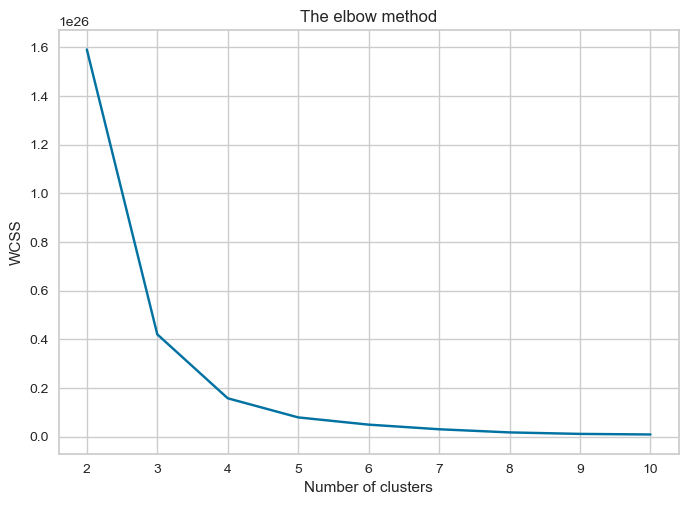

In [157]:
plt.plot(range(2, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

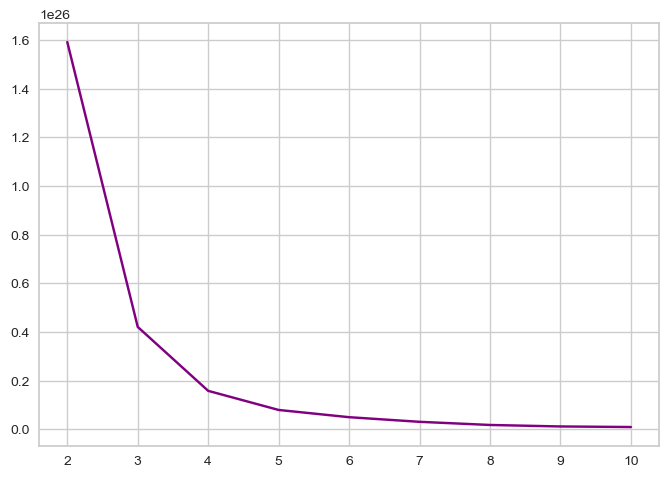

In [158]:
sns.lineplot(x=range(2, 11), y=wcss, markers="*", color="purple");

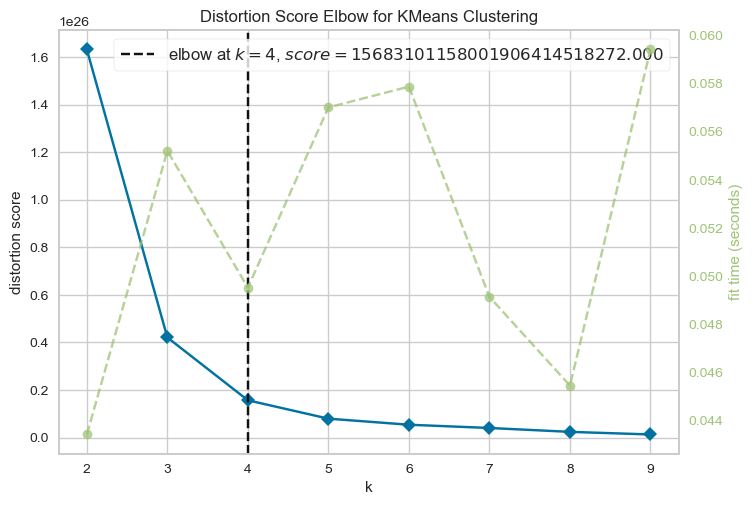

In [160]:

km = KMeans(random_state=42)
vis = KElbowVisualizer(km, k=(2,10))
vis.fit(df)
vis.show();

In [162]:
df1 = pd.read_pickle("df.pkl")
df1 = df1["Country"]

In [171]:
df["Country"] = df1

In [174]:
df[df.cluster==1]["Country"]

130    United States
Name: Country, dtype: object

In [175]:
df[df.cluster==2]["Country"]

40             France
43            Germany
82        Netherlands
129    United Kingdom
Name: Country, dtype: object

In [176]:
df[df.cluster==3]["Country"]

6        Australia
12         Belgium
22          Canada
26           China
53         Ireland
55           Italy
57           Japan
112          Spain
117    Switzerland
Name: Country, dtype: object